In [2]:
import pandas as pd

data_penjualan = pd.read_csv('retail_penjualan.csv', sep = ',')
data_penjualan['Tanggal'] = pd.to_datetime(data_penjualan['Tanggal'])
data_penjualan['Total_penjualan'] = data_penjualan['Jumlah Terjual']*data_penjualan['Harga Satuan']
data_penjualan.head(20)

,Tanggal,Nama Produk,Kategori,Jumlah Terjual,Harga Satuan,Kota,Total_penjualan
0,2024-05-12,Biskuit D,Makanan,5,7000,Medan,35000
1,2024-05-15,Kopi F,Minuman,23,9000,Jakarta,207000
2,2024-05-16,Biskuit D,Makanan,31,7000,Jakarta,217000
3,2024-05-26,Shampoo C,Kebutuhan Rumah,13,12000,Bandung,156000
4,2024-05-20,Sabun Mandi A,Kebutuhan Rumah,7,5000,Bandung,35000
5,2024-05-01,Teh Celup E,Minuman,22,4000,Yogyakarta,88000
6,2024-05-19,Mi Instan B,Makanan,2,3000,Bandung,6000
7,2024-05-05,Biskuit D,Makanan,30,7000,Medan,210000
8,2024-05-01,Biskuit D,Makanan,26,7000,Yogyakarta,182000
9,2024-05-14,Mi Instan B,Makanan,40,3000,Jakarta,120000


In [3]:
penjualan_terbanyak = data_penjualan.groupby(['Kategori','Nama Produk']).agg({'Total_penjualan':'sum'})
penjualan_terbanyak = penjualan_terbanyak.reset_index()
produk_terbanyak = penjualan_terbanyak.loc[penjualan_terbanyak['Total_penjualan'].idxmax()]
produk = produk_terbanyak['Nama Produk']
total_pendapatan_produk = produk_terbanyak['Total_penjualan']
print(produk_terbanyak)
print('\n')
print(f'Produk {produk} memiliki pendapatan terbesar dengan jumlah pendapatan sebesar {total_pendapatan_produk}')

Kategori           Kebutuhan Rumah
Nama Produk              Shampoo C
Total_penjualan            7512000
Name: 1, dtype: object


Produk Shampoo C memiliki pendapatan terbesar dengan jumlah pendapatan sebesar 7512000


In [4]:
penjualan_terbanyak = data_penjualan.groupby(['Kategori']).agg({'Total_penjualan':'sum'})
penjualan_terbanyak = penjualan_terbanyak.reset_index()
kategori_terbanyak = penjualan_terbanyak.loc[penjualan_terbanyak['Total_penjualan'].idxmax()]
kategori = kategori_terbanyak['Kategori']
total_pendapatan_kategori = kategori_terbanyak['Total_penjualan']
print(kategori_terbanyak)
print('\n')
print(f'Kategori {kategori} memiliki pendapatan terbesar dengan jumlah pendapatan sebesar {total_pendapatan_kategori}')

Kategori           Kebutuhan Rumah
Total_penjualan           10912000
Name: 0, dtype: object


Kategori Kebutuhan Rumah memiliki pendapatan terbesar dengan jumlah pendapatan sebesar 10912000


In [5]:
penjualan_terbanyak_kota = data_penjualan.groupby('Kota').agg({'Total_penjualan':'sum'})
penjualan_terbanyak_kota = penjualan_terbanyak_kota.reset_index()
kota_terbanyak = penjualan_terbanyak_kota.loc[penjualan_terbanyak_kota['Total_penjualan'].idxmax()]
kota = kota_terbanyak['Kota']
total_pendapatan_kota = kota_terbanyak['Total_penjualan']
print(penjualan_terbanyak_kota)
print('\n')
print(f'Pemasukkan terbesar berasal dari Kota {kota} dengan jumlah pendapatan sebesar {total_pendapatan_kota}')

         Kota  Total_penjualan
0     Bandung          2946000
1     Jakarta          5911000
2       Medan          4384000
3    Surabaya          5775000
4  Yogyakarta          6686000


Pemasukkan terbesar berasal dari Kota Yogyakarta dengan jumlah pendapatan sebesar 6686000


In [6]:
data_hari = data_penjualan.groupby('Tanggal').agg({'Total_penjualan':'sum'})
penjualan_harian = data_hari.resample('D').sum()
penjualan_harian = penjualan_harian.reset_index()

penjualan_harian_terbanyak = penjualan_harian.loc[penjualan_harian['Total_penjualan'].idxmax()]
tanggal = penjualan_harian_terbanyak['Tanggal']
total_pendapatan_hari = penjualan_harian_terbanyak['Total_penjualan']
print(penjualan_harian)
print('\n')
print(f'Penjualan terbanyak dengan total {total_pendapatan_hari} didapatkan pada tanggal {tanggal}')

      Tanggal  Total_penjualan
0  2024-05-01           636000
1  2024-05-02          1117000
2  2024-05-03           479000
3  2024-05-04           322000
4  2024-05-05          1554000
5  2024-05-06           597000
6  2024-05-07          1854000
7  2024-05-08           265000
8  2024-05-09          1103000
9  2024-05-10           362000
10 2024-05-11           673000
11 2024-05-12           670000
12 2024-05-13           912000
13 2024-05-14           743000
14 2024-05-15           991000
15 2024-05-16          1140000
16 2024-05-17           521000
17 2024-05-18          1318000
18 2024-05-19           486000
19 2024-05-20           133000
20 2024-05-21           381000
21 2024-05-22           349000
22 2024-05-23           424000
23 2024-05-24          1116000
24 2024-05-25          1292000
25 2024-05-26          2749000
26 2024-05-27           463000
27 2024-05-28           243000
28 2024-05-29           819000
29 2024-05-30          1617000
30 2024-05-31           373000


Penjua

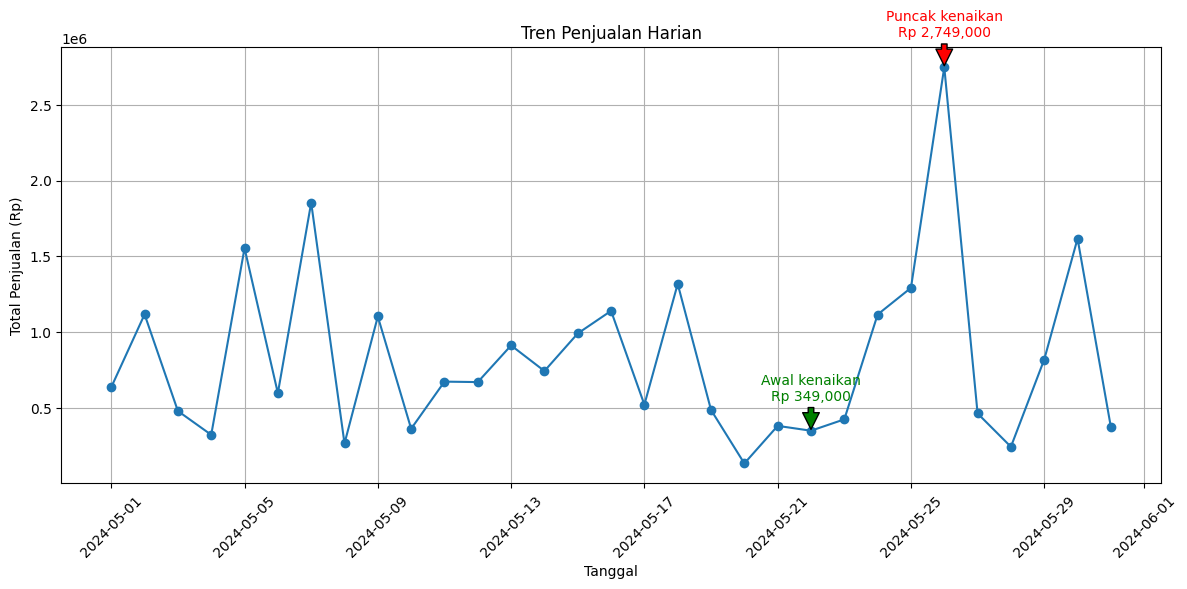

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(penjualan_harian['Tanggal'], penjualan_harian['Total_penjualan'], marker = 'o')
plt.title('Tren Penjualan Harian')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan (Rp)')
plt.grid(True)
plt.xticks(rotation=45)
# Anotasi pada tanggal 2024-05-22 (awal kenaikan)
awal = penjualan_harian[penjualan_harian['Tanggal'] == '2024-05-22'].iloc[0]
plt.annotate('Awal kenaikan\nRp {:,.0f}'.format(awal['Total_penjualan']),
             xy=(awal['Tanggal'], awal['Total_penjualan']),
             xytext=(awal['Tanggal'], awal['Total_penjualan'] + 200000),
             arrowprops=dict(facecolor='green', shrink=0.05),
             ha='center', color='green')

# Anotasi pada tanggal 2024-05-26 (puncak kenaikan)
puncak = penjualan_harian[penjualan_harian['Tanggal'] == '2024-05-26'].iloc[0]
plt.annotate('Puncak kenaikan\nRp {:,.0f}'.format(puncak['Total_penjualan']),
             xy=(puncak['Tanggal'], puncak['Total_penjualan']),
             xytext=(puncak['Tanggal'], puncak['Total_penjualan'] + 200000),
             arrowprops=dict(facecolor='red', shrink=0.05),
             ha='center', color='red')
plt.tight_layout()
plt.show()

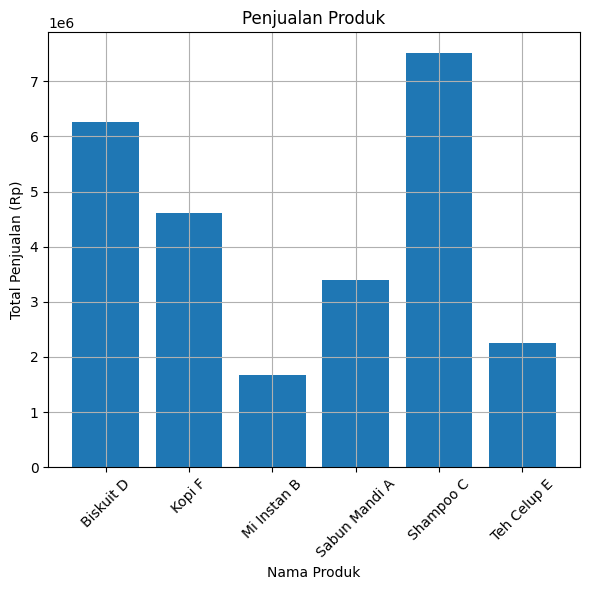

In [31]:
penjualan_produk = data_penjualan.groupby('Nama Produk').agg({'Total_penjualan':'sum'}).reset_index()

plt.figure(figsize=(6,6))
plt.bar(penjualan_produk['Nama Produk'], penjualan_produk['Total_penjualan'])
plt.title('Penjualan Produk')
plt.xlabel('Nama Produk')
plt.ylabel('Total Penjualan (Rp)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

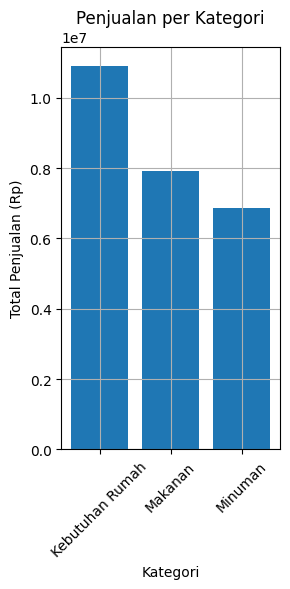

In [32]:
penjualan_kategori = data_penjualan.groupby('Kategori').agg({'Total_penjualan':'sum'}).reset_index()

plt.figure(figsize=(3,6))
plt.bar(penjualan_kategori['Kategori'], penjualan_kategori['Total_penjualan'])
plt.title('Penjualan per Kategori')
plt.xlabel('Kategori')
plt.ylabel('Total Penjualan (Rp)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

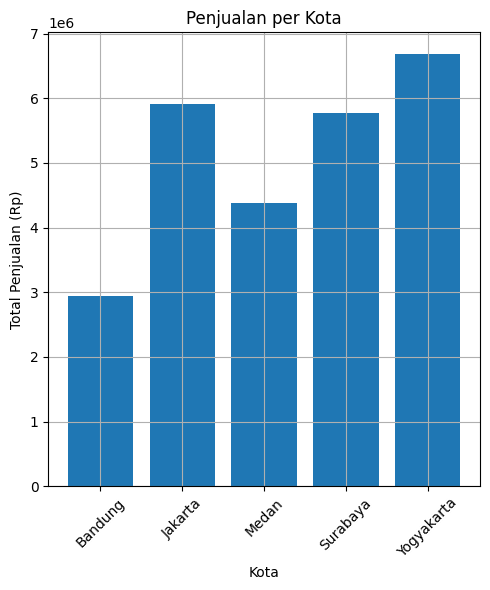

In [34]:
penjualan_kota = data_penjualan.groupby('Kota').agg({'Total_penjualan':'sum'}).reset_index()

plt.figure(figsize=(5,6))
plt.bar(penjualan_kota['Kota'], penjualan_kota['Total_penjualan'])
plt.title('Penjualan per Kota')
plt.xlabel('Kota')
plt.ylabel('Total Penjualan (Rp)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Simpulan:

1. Produk Shampoo paling diminati terutama dalam kategori kebutuhan rumah, yang kebutuhan rumah juga merupakan kategori
    yang memiliki banyak peminat sehingga menjadi sumbangsi pendapat yang menguntungkan. Oleh karenanya, ada baiknya untuk
    meningkatkan fokus stok dan promosi kepada Shampoo C dan Kategori Kebutuhan Rumah

2. Yogyakarta menjadi kota yang minat terbanyak terhadap produk - produk yang kita miliki dengan jumlah pendapatan 
    keseluruhan apling tinggi dari pendistribusian di kota lain, sangat disarankan untuk lebih mengefisiensikan 
    distribusi produk pada kota Yogyakarta.

3. Melihat kembali Analisis di atas, diketahui bahwa meskipun tren penjualan cenderung tidak stabil, tetapi terjadi 
    kenaikan yang konsisten mulai dari tanggal 2024-05-22 sampai puncaknya kenaikan tertinggi berada pada tanggal 2024-05-26.
    Dari - dari tanggal tersebut bisa diperkirakan bahwa para pembeli kemungkinan melakukan pembelian untuk memaksimalkan
    kebutuhan akhir bulan. Dengan begitu, sangat disarankan untuk meningkat promosi dan pemasaran produk pada tanggal -
    tanggal tersebut untuk memaksimalkan penjualan produk
